# Model Comparisons

Comparing the DDM to other congitive models

In [2]:
# Environment setup
%matplotlib inline
%cd /lang_dec
# Imports
import warnings; warnings.filterwarnings('ignore')
import hddm
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import model_tools, signal_detection

/Users/celefthe/Programming/projects/language_decision


In [3]:
# Import pilot models
pilot_data = hddm.load_csv('/lang_dec/data/pilot_clean.csv')
pilot_model = hddm.HDDM(pilot_data, depends_on={'v': 'stim'}, bias=True)
pilot_model.load_db(dbname='language_decision/models/pilot', db='txt')

pilot_model_threshold = hddm.HDDM(pilot_data, depends_on={'v': 'stim', 'a': 'stim'})
pilot_model_threshold.load_db(dbname='language_decision/models/pilot_threshold', db='txt')

In [4]:
# Import control models
controls_data = hddm.load_csv('/lang_dec/data/controls_clean.csv')
controls_model = hddm.HDDM(controls_data, depends_on={'v': 'stim'}, bias=True)
controls_model.load_db(dbname='language_decision/models/controls', db='txt')

controls_model_threshold = hddm.HDDM(controls_data, depends_on={'v': 'stim', 'a': 'stim'})
controls_model_threshold.load_db(dbname='language_decision/models/controls_threshold', db='txt')

In [5]:
# Import patient models
patients_data = hddm.load_csv('/lang_dec/data/patients_clean.csv')
patients_model = hddm.HDDM(patients_data, depends_on={'v': 'stim'}, bias=True)
patients_model.load_db(dbname='language_decision/models/patients', db='txt')

patients_model_threshold = hddm.HDDM(patients_data, depends_on={'v': 'stim', 'a': 'stim'})
patients_model_threshold.load_db(dbname='language_decision/models/patients_threshold', db='txt')

## DDM vs Signal Detection Theory

Comparing DDM to Signal Detection - does d' correlate with DDM parameters?

In [9]:
def get_d_primes(dataset, stim1, stim2, include_id=False):
    d_primes = dict()
    subject_ids = set(dataset.subj_idx)
    for subject_id in subject_ids:
        stim1_data = dataset.loc[
            dataset['subj_idx'] == subject_id].loc[
            dataset['stim'] == str(stim1)]
        stim1_trials = len(stim1_data)
        hits = len(stim1_data.loc[
            dataset['response'] == 1.0])
        
        stim2_data = dataset.loc[
            dataset['subj_idx'] == subject_id].loc[
            dataset['stim'] == str(stim2)]
        stim2_trials = len(stim2_data)
        
        fas = len(stim2_data.loc[
            dataset['response'] == 0.0])
        
        if not stim1_trials or not stim2_trials:
            d_primes[subject_id] = None # N/A placeholder value
            continue
        
        d_prime = signal_detection.signal_detection(
            n_stim1=stim1_trials, 
            n_stim2=stim2_trials, 
            hits=hits, 
            false_alarms=fas)['d_prime']
        d_primes[subject_id] = d_prime
       
    if not include_id:
        return list(d_primes.values())
    return d_primes

### Threshold difference / d'

In [6]:
def match_dprime_to_threshold(dataset, model, stim1, stim2):
    subject_ids = set(dataset.subj_idx)
    d_primes = get_d_primes(dataset, stim1, stim2, include_id=True)
    for subject_id in subject_ids:
        try:
            d_prime = d_primes[subject_id]
            threshold_stim1 = model.values['a_subj(' + stim1 + ').' + str(subject_id)]
            threshold_stim2 = model.values['a_subj(' + stim2 + ').' + str(subject_id)]
            threshold_diff = abs(threshold_stim2 - threshold_stim1)
            yield (d_prime, threshold_diff)
        except:
            continue

#### SS vs US

SpearmanrResult(correlation=-0.40487450835060296, pvalue=0.1197982750976964)

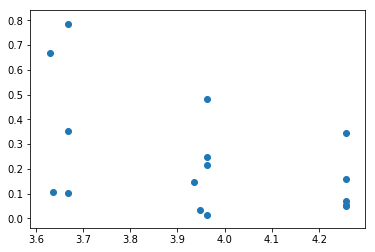

In [10]:
d2t_ss_us = np.array([*match_dprime_to_threshold(pilot_data, pilot_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_us[:,0], d2t_ss_us[:,1])
scipy.stats.spearmanr(d2t_ss_us)


SpearmanrResult(correlation=-0.25714285714285717, pvalue=0.62278717201166178)

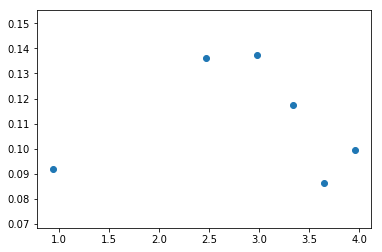

In [11]:
d2t_ss_us = np.array([*match_dprime_to_threshold(controls_data, controls_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_us[:,0], d2t_ss_us[:,1])
scipy.stats.spearmanr(d2t_ss_us)

SpearmanrResult(correlation=-0.49090909090909085, pvalue=0.14965567342083677)

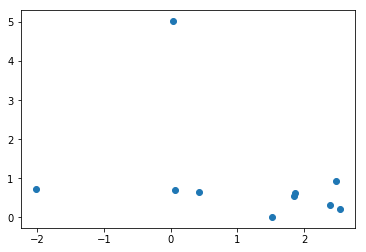

In [12]:
d2t_ss_us = np.array([*match_dprime_to_threshold(patients_data, patients_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_us[:,0], d2t_ss_us[:,1])
scipy.stats.spearmanr(d2t_ss_us)

#### SS vs CS

SpearmanrResult(correlation=-0.40487450835060296, pvalue=0.1197982750976964)

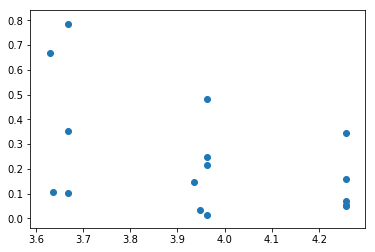

In [13]:
d2t_ss_cs = np.array([*match_dprime_to_threshold(pilot_data, pilot_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_cs[:,0], d2t_ss_cs[:,1])
scipy.stats.spearmanr(d2t_ss_cs)

SpearmanrResult(correlation=-0.25714285714285717, pvalue=0.62278717201166178)

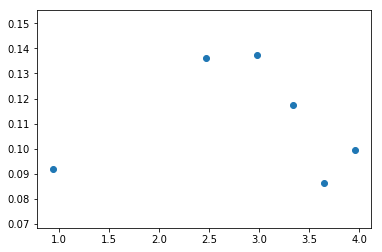

In [14]:
d2t_ss_cs = np.array([*match_dprime_to_threshold(controls_data, controls_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_cs[:,0], d2t_ss_cs[:,1])
scipy.stats.spearmanr(d2t_ss_cs)

SpearmanrResult(correlation=-0.49090909090909085, pvalue=0.14965567342083677)

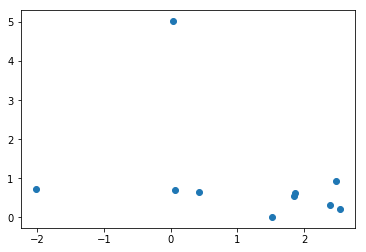

In [15]:
d2t_ss_cs = np.array([*match_dprime_to_threshold(patients_data, patients_model_threshold, 'SS', 'CS')])

plt.scatter(d2t_ss_cs[:,0], d2t_ss_cs[:,1])
scipy.stats.spearmanr(d2t_ss_cs)

#### SS vs CP

SpearmanrResult(correlation=0.38166348634199038, pvalue=0.1446439813312958)

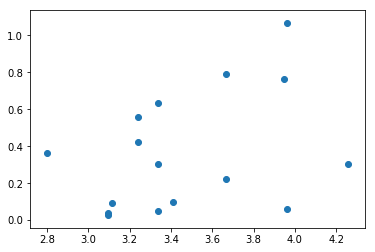

In [16]:
d2t_ss_cp = np.array([*match_dprime_to_threshold(pilot_data, pilot_model_threshold, 'SS', 'CP')])

plt.scatter(d2t_ss_cp[:,0], d2t_ss_cp[:,1])
scipy.stats.spearmanr(d2t_ss_cp)

SpearmanrResult(correlation=-0.14285714285714288, pvalue=0.7871720116618075)

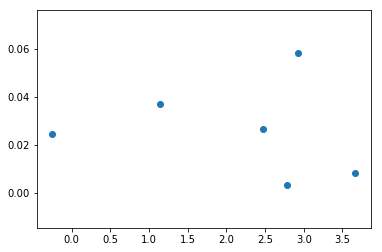

In [17]:
d2t_ss_cp = np.array([*match_dprime_to_threshold(controls_data, controls_model_threshold, 'SS', 'CP')])

plt.scatter(d2t_ss_cp[:,0], d2t_ss_cp[:,1])
scipy.stats.spearmanr(d2t_ss_cp)

SpearmanrResult(correlation=-0.68333333333333335, pvalue=0.042442272087072311)

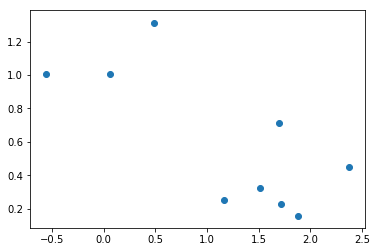

In [18]:
d2t_ss_cp = np.array([*match_dprime_to_threshold(patients_data, patients_model_threshold, 'SS', 'CP')])

plt.scatter(d2t_ss_cp[:,0], d2t_ss_cp[:,1])
scipy.stats.spearmanr(d2t_ss_cp)

### Drift rate / d'

In [19]:
def match_dprime_to_driftrate(dataset, model, stim1, stim2):
    subject_ids = set(dataset.subj_idx)
    d_primes = get_d_primes(dataset, stim1, stim2, include_id=True)
    for subject_id in subject_ids:
        try:
            d_prime = d_primes[subject_id]
            v_stim1 = model.values['v_subj(' + stim1 + ').' + str(subject_id)]
            v_stim2 = model.values['v_subj(' + stim2 + ').' + str(subject_id)]
            v_diff = abs(v_stim2 - v_stim1)
            yield (d_prime, v_diff)
        except: 
            continue

#### SS vs US

SpearmanrResult(correlation=-0.29959068297865976, pvalue=0.25961865774098775)

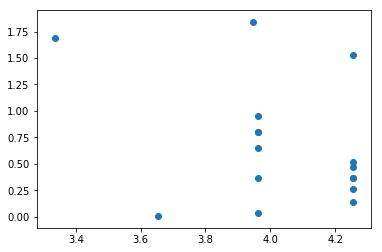

In [26]:
d2v_ss_us = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model_threshold, 'SS', 'US')])
plt.scatter(d2v_ss_us[:,0], d2v_ss_us[:,1])
scipy.stats.spearmanr(d2v_ss_us)

SpearmanrResult(correlation=0.21251185925162072, pvalue=0.68603086600889585)

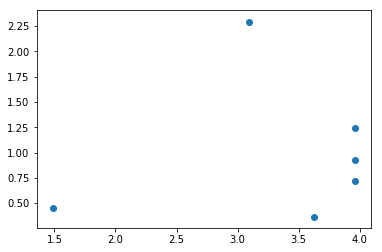

In [27]:
d2v_ss_us = np.array([*match_dprime_to_driftrate(controls_data, controls_model_threshold, 'SS', 'US')])
plt.scatter(d2v_ss_us[:,0], d2v_ss_us[:,1])
scipy.stats.spearmanr(d2v_ss_us)

SpearmanrResult(correlation=-0.018181818181818181, pvalue=0.96024041812862426)

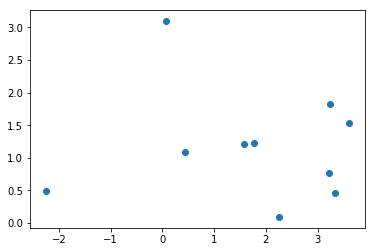

In [28]:
d2v_ss_us = np.array([*match_dprime_to_driftrate(patients_data, patients_model_threshold, 'SS', 'US')])
plt.scatter(d2v_ss_us[:,0], d2v_ss_us[:,1])
scipy.stats.spearmanr(d2v_ss_us)

#### SS vs CS

SpearmanrResult(correlation=-0.092971183399027324, pvalue=0.73200385751893948)

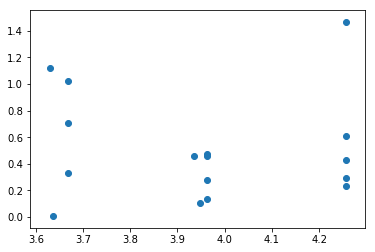

In [29]:
d2v_ss_cs = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model_threshold, 'SS', 'CS')])
plt.scatter(d2v_ss_cs[:,0], d2v_ss_cs[:,1])
scipy.stats.spearmanr(d2v_ss_cs)

SpearmanrResult(correlation=-0.028571428571428574, pvalue=0.95715451895043735)

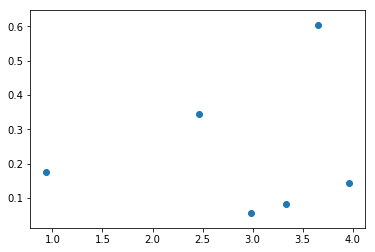

In [30]:
d2v_ss_cs = np.array([*match_dprime_to_driftrate(controls_data, controls_model_threshold, 'SS', 'CS')])
plt.scatter(d2v_ss_cs[:,0], d2v_ss_cs[:,1])
scipy.stats.spearmanr(d2v_ss_cs)

SpearmanrResult(correlation=-0.63636363636363624, pvalue=0.04791172612997547)

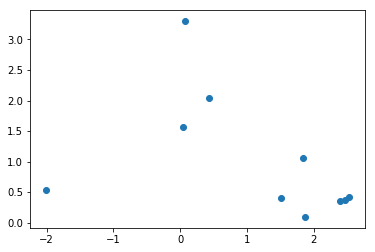

In [31]:
d2v_ss_cs = np.array([*match_dprime_to_driftrate(patients_data, patients_model_threshold, 'SS', 'CS')])
plt.scatter(d2v_ss_cs[:,0], d2v_ss_cs[:,1])
scipy.stats.spearmanr(d2v_ss_cs)

#### SS vs CP

SpearmanrResult(correlation=0.0014793158385348465, pvalue=0.99566175193362283)

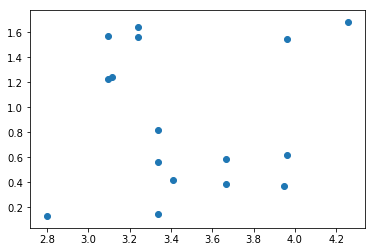

In [32]:
d2v_ss_cp = np.array([*match_dprime_to_driftrate(pilot_data, pilot_model_threshold, 'SS', 'CP')])
plt.scatter(d2v_ss_cp[:,0], d2v_ss_cp[:,1])
scipy.stats.spearmanr(d2v_ss_cp)

SpearmanrResult(correlation=-0.59999999999999998, pvalue=0.20799999999999982)

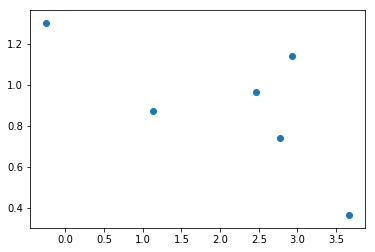

In [33]:
d2v_ss_cp = np.array([*match_dprime_to_driftrate(controls_data, controls_model_threshold, 'SS', 'CP')])
plt.scatter(d2v_ss_cp[:,0], d2v_ss_cp[:,1])
scipy.stats.spearmanr(d2v_ss_cp)

SpearmanrResult(correlation=-0.79999999999999993, pvalue=0.0096279247253798304)

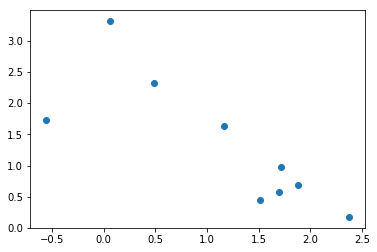

In [34]:
d2v_ss_cp = np.array([*match_dprime_to_driftrate(patients_data, patients_model_threshold, 'SS', 'CP')])
plt.scatter(d2v_ss_cp[:,0], d2v_ss_cp[:,1])
scipy.stats.spearmanr(d2v_ss_cp)

### Drift rate & threshold diff / d'